In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("data2/insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df=df.dropna()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.describe(include="all")

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
numerical=df.columns[df.dtypes=="object"]
categorical=df.columns[df.dtypes!="object"]

In [11]:
print(numerical)
print(categorical)

Index(['sex', 'smoker', 'region'], dtype='object')
Index(['age', 'bmi', 'children', 'charges'], dtype='object')


In [12]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='sex', ylabel='charges'>

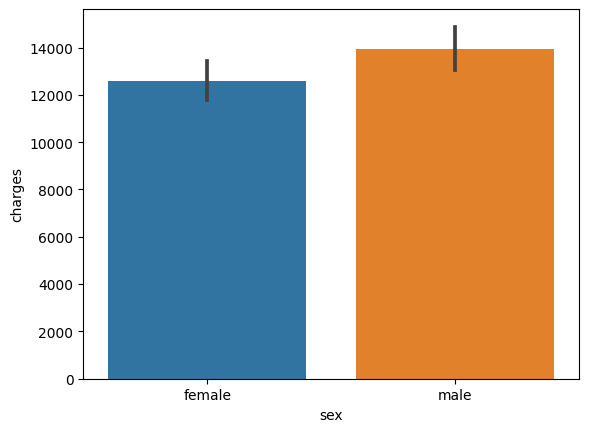

In [14]:
sns.barplot(x="sex",y="charges",data=df)

Text(0.5, 1.0, 'Male vs Female Percentage')

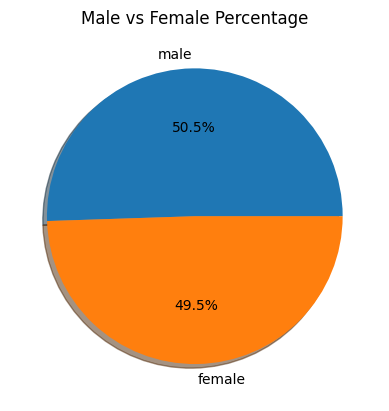

In [17]:
s = df['sex'].value_counts()
plt.pie(s, labels = s.index, autopct='%1.1f%%', shadow=True)
plt.title("Male vs Female Percentage")


Text(0.5, 1.0, 'Age Distribution')

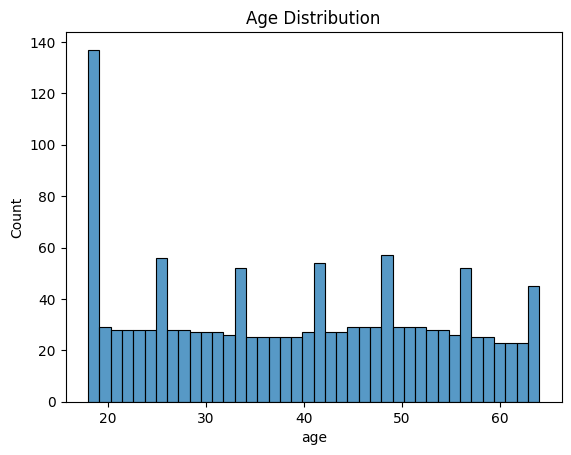

In [18]:
sns.histplot(data=df, x='age', bins=40)
plt.title("Age Distribution")


In [19]:
import numpy as np

In [20]:
bmi = df["bmi"]

cond_list = [bmi < 18.5, bmi < 25, bmi < 30, bmi >= 30]
choice_list = ['underweight', 'normal', 'overweight', 'obese']

df["bmi_cat"] = np.select(cond_list, choice_list)
df.head(10)

,age,sex,bmi,children,smoker,region,charges,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight
5,31,female,25.740,0,no,southeast,3756.62160,overweight
6,46,female,33.440,1,no,southeast,8240.58960,obese
7,37,female,27.740,3,no,northwest,7281.50560,overweight
8,37,male,29.830,2,no,northeast,6406.41070,overweight
9,60,female,25.840,0,no,northwest,28923.13692,overweight


Text(0, 0.5, 'Charges')

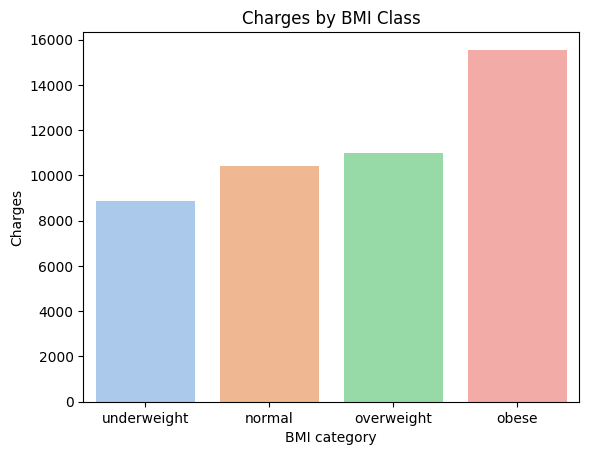

In [21]:
palette = sns.color_palette("pastel")
sns.set_palette(palette)

sns.barplot(data=df, x='bmi_cat', y='charges', order=['underweight', 'normal', 'overweight', 'obese'], errorbar=None)
plt.title('Charges by BMI Class')
plt.xlabel('BMI category')
plt.ylabel('Charges')


In [22]:
charges_by_cat = df.groupby('bmi_cat').charges.mean()
print(charges_by_cat)

bmi_cat
normal         10409.337709
obese          15552.335469
overweight     10987.509891
underweight     8852.200585
Name: charges, dtype: float64


Text(0, 0.5, 'Charges')

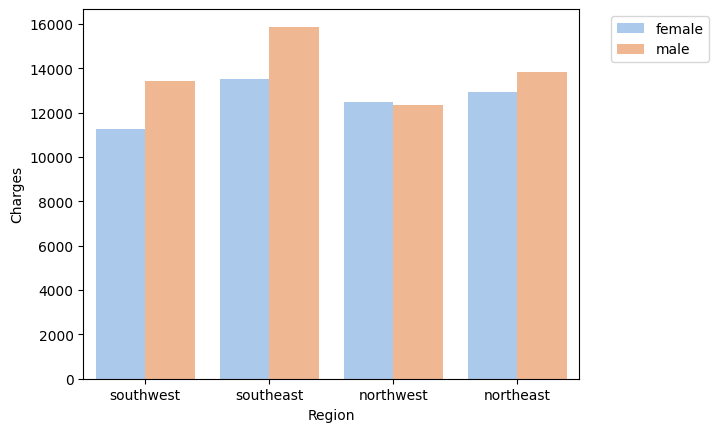

In [26]:
sns.set_palette(palette)

sns.barplot(x=df['region'], y=df['charges'], hue=df['sex'], errorbar=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Region")
plt.ylabel("Charges")


Text(0, 0.5, 'Charges')

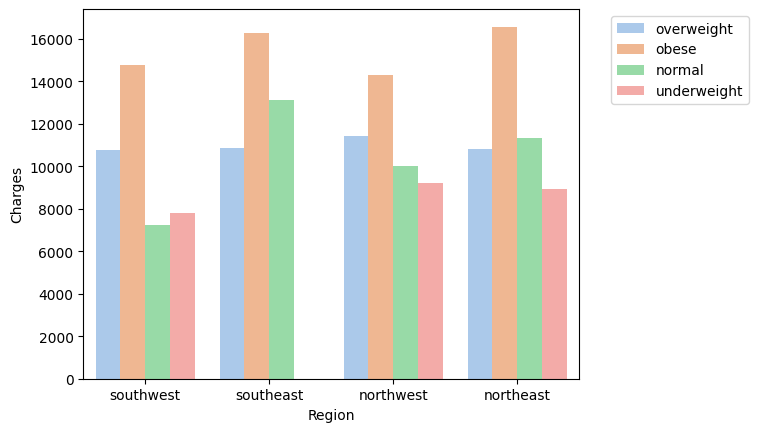

In [27]:
sns.set_palette(palette)

sns.barplot(x=df['region'], y=df['charges'], hue=df['bmi_cat'], errorbar=None)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.xlabel("Region")
plt.ylabel("Charges")

Text(0.5, 1.0, 'BMI by Region')

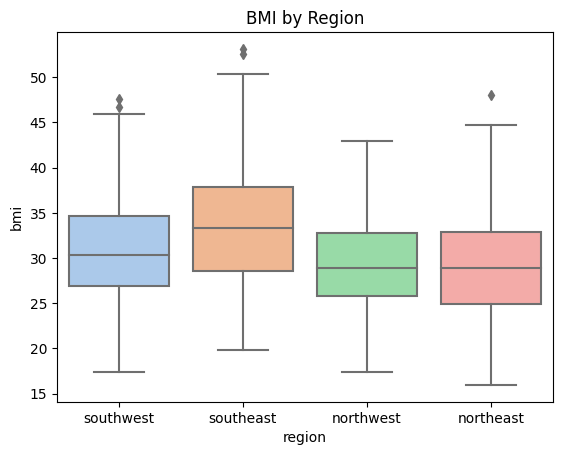

In [28]:
sns.set_palette(palette)
sns.boxplot(x = 'region', y = 'bmi', data = df)
plt.title("BMI by Region")


Text(0, 0.5, 'Amount of Smokers')

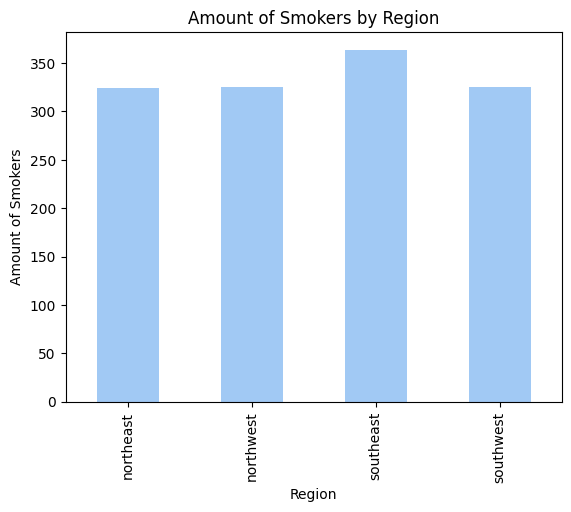

In [29]:
sns.set_palette(palette)
smokercount = df.groupby('region').smoker.count().plot(kind="bar")
plt.title("Amount of Smokers by Region")
plt.xlabel("Region")
plt.ylabel("Amount of Smokers")

Text(0, 0.5, 'Region')

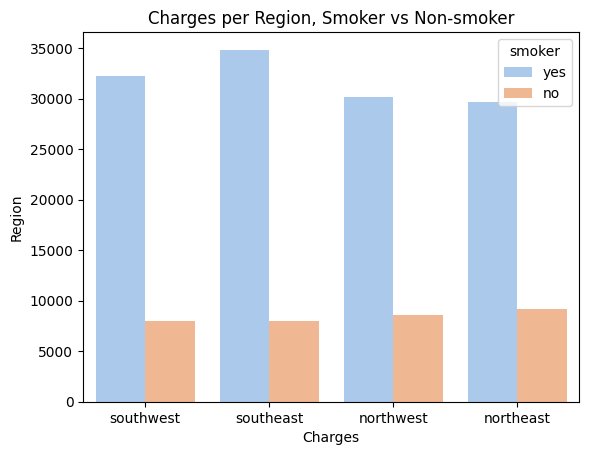

In [30]:
sns.barplot(x=df['region'], y=df['charges'], hue=df['smoker'], errorbar=None)
plt.title("Charges per Region, Smoker vs Non-smoker")
plt.xlabel("Charges")
plt.ylabel("Region")

Text(0, 0.5, 'Charges')

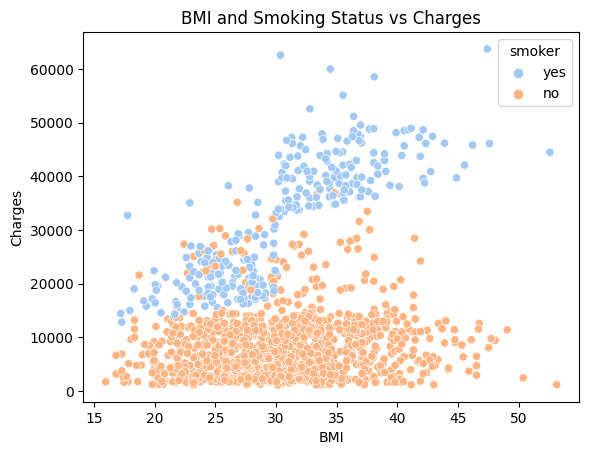

In [31]:
sns.set_palette(palette)
fig = sns.scatterplot(df, x='bmi', y='charges', hue='smoker')
plt.title("BMI and Smoking Status vs Charges")
plt.xlabel("BMI")
plt.ylabel("Charges")

In [39]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_cat
0,19,female,27.900,0,yes,southwest,16884.92400,overweight
1,18,male,33.770,1,no,southeast,1725.55230,obese
2,28,male,33.000,3,no,southeast,4449.46200,obese
3,33,male,22.705,0,no,northwest,21984.47061,normal
4,32,male,28.880,0,no,northwest,3866.85520,overweight


In [43]:
df["sex"]=df["sex"].map({"male":1,"female":0})

In [45]:
df["smoker"]=df["smoker"].map({"yes":1,"no":0})

In [47]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [48]:
df["region"]=df["region"].map({"southwest":0,"southeast":1,"northwest":2,"northeast":3})

In [49]:
df["bmi_cat"].unique()

array(['overweight', 'obese', 'normal', 'underweight'], dtype=object)

In [52]:
choice_list1 = {'underweight':3, 'normal':2, 'overweight':1, 'obese':0}
df["bmi_cat"]=df["bmi_cat"].map(choice_list1)

In [53]:
df.head()

,age,sex,bmi,children,smoker,region,charges,bmi_cat
0,19,0,27.900,0,1,0,16884.92400,1
1,18,1,33.770,1,0,1,1725.55230,0
2,28,1,33.000,3,0,1,4449.46200,0
3,33,1,22.705,0,0,2,21984.47061,2
4,32,1,28.880,0,0,2,3866.85520,1


In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet

In [69]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import confusion_matrix,classification_report

In [57]:
x=df.drop("charges",axis=1)
y=df["charges"]

In [60]:
X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)
scalar=StandardScaler()
scalar.fit_transform(X_train,y_train)
scalar.transform(X_test)


array([[ 0.40590937, -1.02486255, -0.89749036, ..., -0.51530255,
         1.32346971,  0.40773462],
       [-0.22770525, -1.02486255, -0.087384  , ..., -0.51530255,
         0.42306815, -0.84769568],
       [ 1.74354023, -1.02486255, -0.61157047, ...,  1.94060749,
         0.42306815,  0.40773462],
       ...,
       [ 0.96912236,  0.9757406 , -1.52868777, ..., -0.51530255,
        -1.37773499,  1.66316492],
       [-0.9317215 , -1.02486255, -0.15092176, ..., -0.51530255,
         1.32346971,  0.40773462],
       [-1.14292637,  0.9757406 ,  0.33731571, ..., -0.51530255,
        -0.47733342, -0.84769568]])

In [72]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    #cf_matrix=confusion_matrix(true,predicted)
    
    return mae, rmse, r2_square


In [73]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet()
}
trained_model_list=[]
model_list=[]
r2_list=[]

for i in range(len(list(models))):
    model=list(models.values())[i]
    

    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)
    #sns.heatmap(cf_matrix,annot=True)
    #plt.title("Confusion matrix for logestic regression" , fontsize=10,y=1.03)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')

LinearRegression
Model Training Performance
RMSE: 5973.289331161925
MAE: 4379.462518111471
R2 score 75.65234623412933


Lasso
Model Training Performance
RMSE: 5972.976554672415
MAE: 4379.322476168292
R2 score 75.6548959764473


Ridge
Model Training Performance
RMSE: 5974.50577967684
MAE: 4390.946400045467
R2 score 75.6424285216555


Elasticnet
Model Training Performance
RMSE: 9333.771845832589
MAE: 7312.3224196029205
R2 score 40.55102430856516


